In [5]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Dropout
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

'2.2.2'

In [6]:
width = 28
height = 28

In [7]:
train_dir = 'C:\\image\\train_output'
test_dir = 'C:\\image\\test_input'

In [8]:
train_file_name = os.listdir(train_dir)
print(train_file_name)

['1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '7.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '8.jpg', '9.jpg']


In [9]:
test_file_name = os.listdir(test_dir)
print(test_file_name)

['hello1.png', 'hello10.png', 'hello2.png', 'hello3.png', 'hello4.png', 'hello5.png', 'hello6.png', 'hello7.png', 'hello8.png', 'hello9.png']


In [10]:
train_input = []
train_output = []
test_input = []

In [11]:
for i in train_file_name:
        img = os.path.join(train_dir, i)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 1))
        train_input.append(img)

In [12]:
for i in train_file_name:
        img = os.path.join(train_dir, i)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 3))
        train_output.append(img)

In [13]:
for i in test_file_name:
        img = os.path.join(test_dir, i)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 1))
        test_input.append(img)

In [14]:
train_input = np.array(train_input)
train_output = np.array(train_output)
test_input = np.array(test_input)

In [15]:
print(len(train_input))
print(len(train_output))
print(len(test_input))

78
78
10


In [16]:
a = train_input[1].reshape(28, 28)

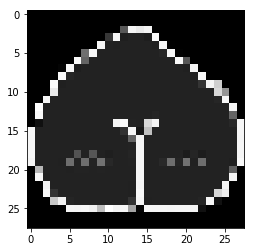

In [17]:
plt.imshow(a, cmap = 'Greys')

In [18]:
b = train_output[1].reshape(28, 28, 3)

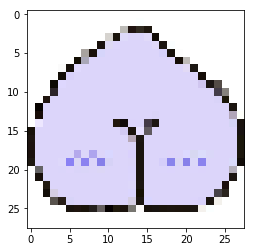

In [19]:
plt.imshow(b, cmap = 'Greys')

In [20]:
c = test_input[1].reshape(28, 28)

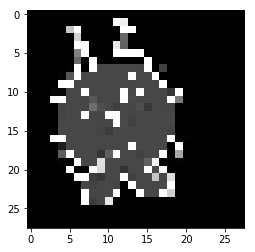

In [21]:
plt.imshow(c, cmap = 'Greys')

In [22]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)

(78, 28, 28, 1)
(78, 28, 28, 3)
(10, 28, 28, 1)


In [23]:
# train_input = train_input.reshape(len(train_input), 784)
# train_output = train_output.reshape(len(train_output), 784)
# #한줄로 세워서 넣기

In [24]:
print(train_input.shape)
print(train_output.shape)

(78, 28, 28, 1)
(78, 28, 28, 3)


In [25]:
train_input = train_input.reshape((len(train_input), width, height, 1))
train_output = train_output.reshape(len(train_output), 3 * 784)
#그림으로 넣기

In [26]:
print(train_input.shape)
print(train_output.shape)

(78, 28, 28, 1)
(78, 2352)


In [27]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (width, height, train_input.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense((3 * 784), activation = 'sigmoid'))

In [124]:
# model = Sequential()
# model.add(Dense(1024, input_dim=784,))
# model.add(LeakyReLU(0.2))
# model.add(Dropout(0.3))

# model.add(Dense(512))
# model.add(LeakyReLU(0.2))
# model.add(Dropout(0.3))

# model.add(Dense(256))
# model.add(LeakyReLU(0.2))
# model.add(Dropout(0.3))

# model.add(Dense(784, activation='sigmoid'))

In [28]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(x = train_input, y = train_output, batch_size = 5, epochs = 10)

Epoch 1/10
78/78 [==============================] - 5s 67ms/step - loss: -2308.3232 - acc: 0.0015: 8s - loss: -1227.5920 - a
Epoch 2/10
78/78 [==============================] - 2s 20ms/step - loss: -2852.9922 - acc: 0.0012 ETA: 0s - loss: -2911.7460 - acc
Epoch 3/10
78/78 [==============================] - 2s 20ms/step - loss: -2853.5448 - acc: 0.0012
Epoch 4/10
78/78 [==============================] - 2s 21ms/step - loss: -2853.5449 - acc: 0.0012
Epoch 5/10
78/78 [==============================] - 2s 20ms/step - loss: -2853.5449 - acc: 0.0012
Epoch 6/10
78/78 [==============================] - 2s 20ms/step - loss: -2853.5450 - acc: 0.0012
Epoch 7/10
78/78 [==============================] - 2s 20ms/step - loss: -2853.1332 - acc: 0.0012
Epoch 8/10
78/78 [==============================] - 2s 21ms/step - loss: -2853.5449 - acc: 0.0012
Epoch 9/10
78/78 [==============================] - 1s 19ms/step - loss: -2853.5449 - acc: 0.0012
Epoch 10/10
78/78 [==============================] - 2s 21

In [41]:
# test_input = np.random.normal(0, 1, size=[78, 784])

In [30]:
test_input.shape

(10, 28, 28, 1)

In [31]:
test_input = test_input.reshape(len(test_input), 28, 28, 1)

In [32]:
result = model.predict(x = test_input)

In [33]:
print(result)

[[1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]]


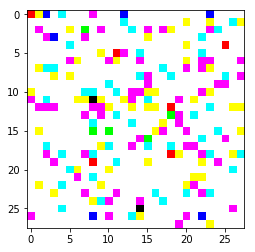

In [34]:
plt.imshow(result[2].reshape(width, height, 3))

In [ ]:
# train_input = np.random.normal(0, 1, size=[78, 784])